# Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data

#### 2. Data Cleaning

#### 3. Exploring Relationships

        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

### Importing visualizations libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#defining path

path = '/Users/Ana/Documents/Hate Crimes in the US'

In [5]:
path

'/Users/Ana/Documents/Hate Crimes in the US'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path,'Prepared dataset', 'hate_crime_wrangled.csv'))

In [8]:
#checking dataframe 
df.shape

(201403, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                201403 non-null  int64  
 1   INCIDENT_ID               201403 non-null  int64  
 2   DATA_YEAR                 201403 non-null  int64  
 3   ORI                       201403 non-null  object 
 4   PUB_AGENCY_NAME           201403 non-null  object 
 5   AGENCY_TYPE_NAME          201403 non-null  object 
 6   STATE_ABBR                201403 non-null  object 
 7   STATE_NAME                201403 non-null  object 
 8   DIVISION_NAME             201403 non-null  object 
 9   REGION_NAME               201403 non-null  object 
 10  POPULATION_GROUP_CODE     201403 non-null  object 
 11  POPULATION_GROUP_DESC     201403 non-null  object 
 12  INCIDENT_DATE             201403 non-null  object 
 13  TOTAL_OFFENDER_COUNT      201403 non-null  i

In [14]:
df.head()

Unnamed: 0  INCIDENT_ID  DATA_YEAR        ORI PUB_AGENCY_NAME  \
0           0            2       1991  AZ0072300         Phoenix   
1           1            3       1991  AZ0072300         Phoenix   
2           2            4       1991  AZ0072300         Phoenix   
3           3            5       1991  AZ0072300         Phoenix   
4           4            6       1991  AZ0072300         Phoenix   

  AGENCY_TYPE_NAME STATE_ABBR STATE_NAME DIVISION_NAME REGION_NAME  ...  \
0             City         AZ    Arizona      Mountain        West  ...   
1             City         AZ    Arizona      Mountain        West  ...   
2             City         AZ    Arizona      Mountain        West  ...   
3             City         AZ    Arizona      Mountain        West  ...   
4             City         AZ    Arizona      Mountain        West  ...   

  TOTAL_OFFENDER_COUNT OFFENDER_RACE VICTIM_COUNT  \
0                    0       Unknown            1   
1                    1       Unknown            1   
2                    1       Unknown            1   
3                    1         White            1   
4                    0       Unknown            1   

                               OFFENSE_NAME TOTAL_INDIVIDUAL_VICTIMS  \
0                              Intimidation                      1.0   
1                              Intimidation                      1.0   
2                              Intimidation                      1.0   
3                        Aggravated Assault                      1.0   
4  Destruction/Damage/Vandalism of Property                      0.0   

                        LOCATION_NAME                       BIAS_DESC  \
0                      Residence/Home  Anti-Black or African American   
1      Church/Synagogue/Temple/Mosque                     Anti-Jewish   
2                      Residence/Home                       Anti-Arab   
3  Highway/Road/Alley/Street/Sidewalk  Anti-Black or African American   
4      Church/Synagogue/Temple/Mosque                 Anti-Protestant   

             VICTIM_TYPES MULTIPLE_OFFENSE MULTIPLE_BIAS  
0              Individual                S             S  
1              Individual                S             S  
2              Individual                S             S  
3              Individual                S             S  
4  Religious Organization                S             S  

[5 rows x 23 columns]

### Data cleaning

In [15]:
#dropping "Unnamed" column
df.drop(columns =['Unnamed: 0'])

INCIDENT_ID  DATA_YEAR        ORI PUB_AGENCY_NAME AGENCY_TYPE_NAME  \
0                 2       1991  AZ0072300         Phoenix             City   
1                 3       1991  AZ0072300         Phoenix             City   
2                 4       1991  AZ0072300         Phoenix             City   
3                 5       1991  AZ0072300         Phoenix             City   
4                 6       1991  AZ0072300         Phoenix             City   
...             ...        ...        ...             ...              ...   
201398       603106       2017  AR0660100      Fort Smith             City   
201399       603108       2017  AR0660100      Fort Smith             City   
201400       603109       2018  AR0660100      Fort Smith             City   
201401       603110       2018  AR0600400        Sherwood             City   
201402       603113       2018  AR0660100      Fort Smith             City   

       STATE_ABBR STATE_NAME       DIVISION_NAME REGION_NAME  \
0              AZ    Arizona            Mountain        West   
1              AZ    Arizona            Mountain        West   
2              AZ    Arizona            Mountain        West   
3              AZ    Arizona            Mountain        West   
4              AZ    Arizona            Mountain        West   
...           ...        ...                 ...         ...   
201398         AR   Arkansas  West South Central       South   
201399         AR   Arkansas  West South Central       South   
201400         AR   Arkansas  West South Central       South   
201401         AR   Arkansas  West South Central       South   
201402         AR   Arkansas  West South Central       South   

       POPULATION_GROUP_CODE  ... TOTAL_OFFENDER_COUNT  \
0                         1B  ...                    0   
1                         1B  ...                    1   
2                         1B  ...                    1   
3                         1B  ...                    1   
4                         1B  ...                    0   
...                      ...  ...                  ...   
201398                     3  ...                    2   
201399                     3  ...                    2   
201400                     3  ...                    1   
201401                     4  ...                    0   
201402                     3  ...                    1   

                    OFFENDER_RACE  VICTIM_COUNT  \
0                         Unknown             1   
1                         Unknown             1   
2                         Unknown             1   
3                           White             1   
4                         Unknown             1   
...                           ...           ...   
201398                      White             1   
201399                   Multiple             1   
201400                      White             1   
201401                    Unknown             1   
201402  Black or African American             1   

                                    OFFENSE_NAME  TOTAL_INDIVIDUAL_VICTIMS  \
0                                   Intimidation                       1.0   
1                                   Intimidation                       1.0   
2                                   Intimidation                       1.0   
3                             Aggravated Assault                       1.0   
4       Destruction/Damage/Vandalism of Property                       0.0   
...                                          ...                       ...   
201398                            Simple Assault                       1.0   
201399                              Intimidation                       2.0   
201400              Burglary/Breaking & Entering                       1.0   
201401  Destruction/Damage/Vandalism of Property                       1.0   
201402                    Counterfeiting/Forgery                       0.0   

                             LOCATION_NAME             

In [16]:
df.head()

Unnamed: 0  INCIDENT_ID  DATA_YEAR        ORI PUB_AGENCY_NAME  \
0           0            2       1991  AZ0072300         Phoenix   
1           1            3       1991  AZ0072300         Phoenix   
2           2            4       1991  AZ0072300         Phoenix   
3           3            5       1991  AZ0072300         Phoenix   
4           4            6       1991  AZ0072300         Phoenix   

  AGENCY_TYPE_NAME STATE_ABBR STATE_NAME DIVISION_NAME REGION_NAME  ...  \
0             City         AZ    Arizona      Mountain        West  ...   
1             City         AZ    Arizona      Mountain        West  ...   
2             City         AZ    Arizona      Mountain        West  ...   
3             City         AZ    Arizona      Mountain        West  ...   
4             City         AZ    Arizona      Mountain        West  ...   

  TOTAL_OFFENDER_COUNT OFFENDER_RACE VICTIM_COUNT  \
0                    0       Unknown            1   
1                    1       Unknown            1   
2                    1       Unknown            1   
3                    1         White            1   
4                    0       Unknown            1   

                               OFFENSE_NAME TOTAL_INDIVIDUAL_VICTIMS  \
0                              Intimidation                      1.0   
1                              Intimidation                      1.0   
2                              Intimidation                      1.0   
3                        Aggravated Assault                      1.0   
4  Destruction/Damage/Vandalism of Property                      0.0   

                        LOCATION_NAME                       BIAS_DESC  \
0                      Residence/Home  Anti-Black or African American   
1      Church/Synagogue/Temple/Mosque                     Anti-Jewish   
2                      Residence/Home                       Anti-Arab   
3  Highway/Road/Alley/Street/Sidewalk  Anti-Black or African American   
4      Church/Synagogue/Temple/Mosque                 Anti-Protestant   

             VICTIM_TYPES MULTIPLE_OFFENSE MULTIPLE_BIAS  
0              Individual                S             S  
1              Individual                S             S  
2              Individual                S             S  
3              Individual                S             S  
4  Religious Organization                S             S  

[5 rows x 23 columns]

## Exploring Relationships

### Correlations

In [17]:
df.columns

Index(['Unnamed: 0', 'INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [18]:
# Create subset excluding categorical variables.
sub = df[['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT','TOTAL_INDIVIDUAL_VICTIMS']]

In [19]:
# Create a correlation matrix using pandas

sub.corr()

TOTAL_OFFENDER_COUNT  VICTIM_COUNT  \
TOTAL_OFFENDER_COUNT                  1.000000      0.116009   
VICTIM_COUNT                          0.116009      1.000000   
TOTAL_INDIVIDUAL_VICTIMS              0.189649      0.832902   

                          TOTAL_INDIVIDUAL_VICTIMS  
TOTAL_OFFENDER_COUNT                      0.189649  
VICTIM_COUNT                              0.832902  
TOTAL_INDIVIDUAL_VICTIMS                  1.000000

In [20]:
sub.shape

(201403, 3)

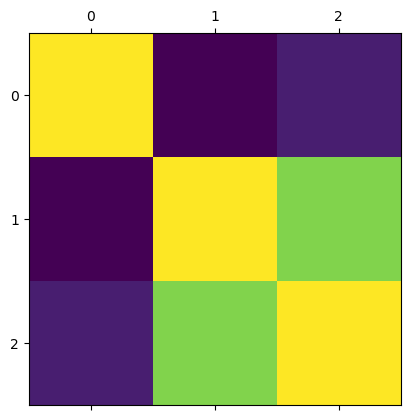

In [21]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

#### Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(3, 3)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

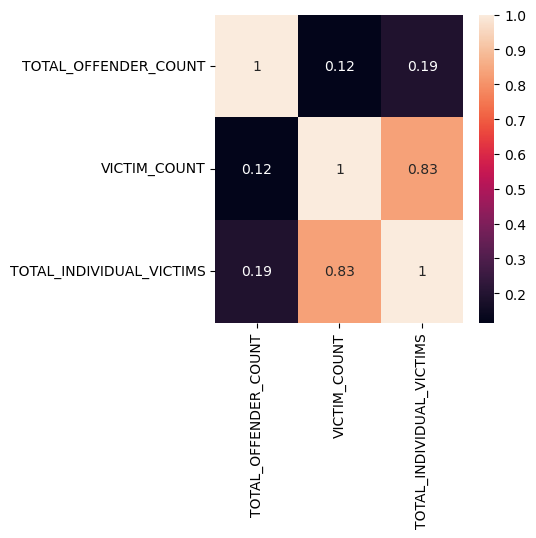

In [24]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

We can see in the heatmap that as the total number of individual victims increase, so will the victim count, therefore, the victim count and the total individual victims have strong correlation of 0.83.

There is a weak correlations between the total offender count and total individual victims and between the victim count and total offender count.

### Scatterplots

/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


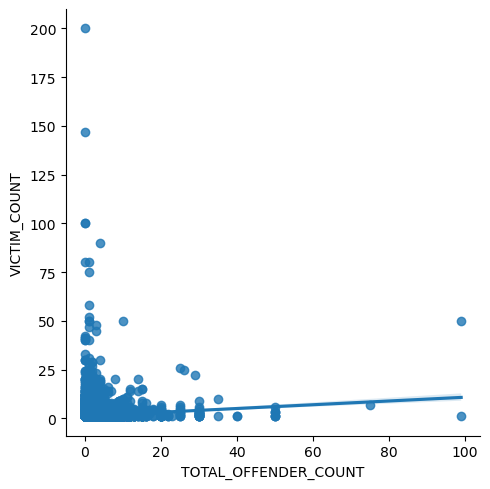

In [26]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "VICTIM_COUNT"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='VICTIM_COUNT', data = df)

 There are many of the points clustered around the beginning of line, which is going up slighly; the rest of the points are outliers. It can be said that there is a positive relationship although it is not strong.

/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


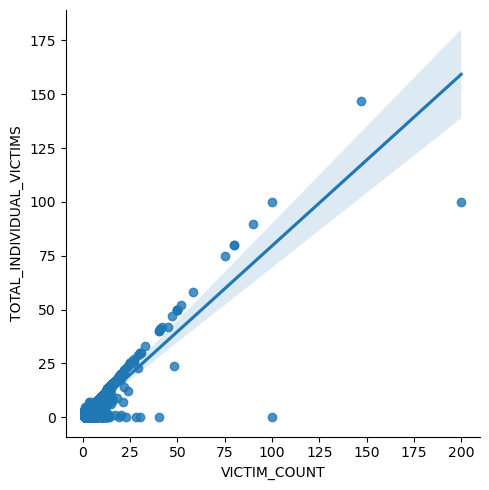

In [27]:
# Scatterplot for the "VICTIM_COUNT" and the "TOTAL_INDIVIDUAL_VICTIMS"
sns.lmplot(x='VICTIM_COUNT', y ='TOTAL_INDIVIDUAL_VICTIMS', data = df)

There is an uptrendline with many points clustered at the beginning of the line and a few outliers. We can assume that there is a STRONG and POSITIVE relationship between the victim count and the total individual victims.

## Pair Plots

In [28]:
sub.columns

Index(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT', 'TOTAL_INDIVIDUAL_VICTIMS'], dtype='object')

/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


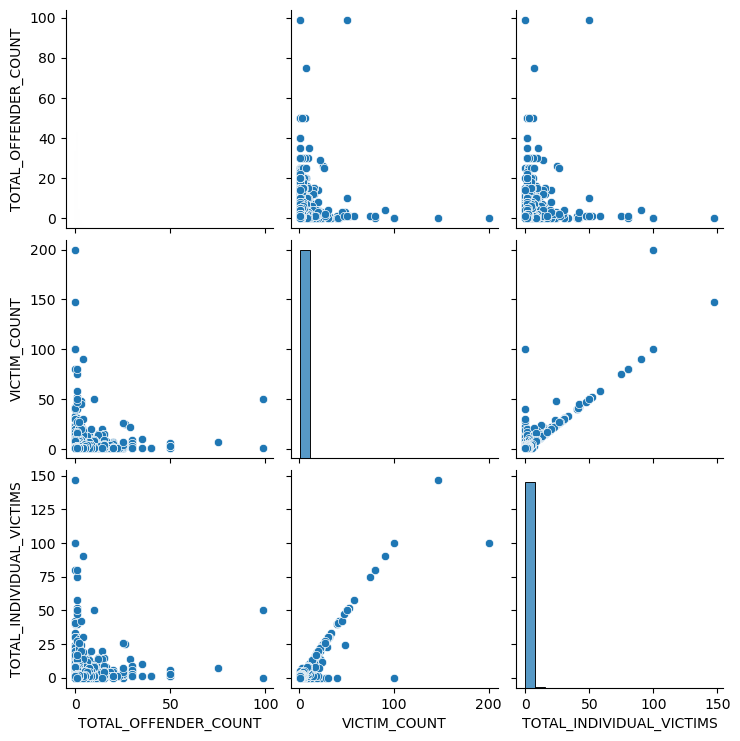

In [29]:
g = sns.pairplot(sub)

We can confirmed the strong relationship between the total individual victims and victim count.

## Categorical Plots

<Axes: xlabel='TOTAL_INDIVIDUAL_VICTIMS', ylabel='Count'>

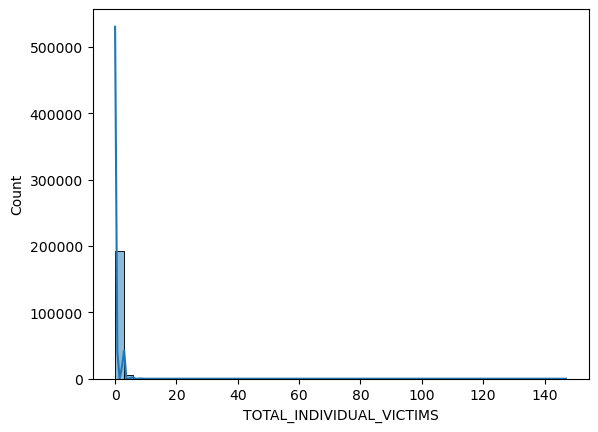

In [30]:
#Create a categorical plot. 
sns.histplot(df['TOTAL_INDIVIDUAL_VICTIMS'], bins = 50, kde = True)

In [31]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] < 2, 'Individual Victim Category'] = 'Low Victim Count'

In [32]:
df.loc[(df['TOTAL_INDIVIDUAL_VICTIMS'] >= 2) & (df['TOTAL_INDIVIDUAL_VICTIMS'] < 5),'Individual Victim Category'] = 'Median Victim Count' 

In [33]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] >= 5, 'Individual Victim Category'] = 'High Victim Count'

In [34]:
df['TOTAL_INDIVIDUAL_VICTIMS'].value_counts(dropna = False)

TOTAL_INDIVIDUAL_VICTIMS
1.0      132053
0.0       43627
2.0       17527
3.0        3930
NaN        1606
4.0        1367
5.0         582
6.0         271
7.0         120
8.0          82
10.0         61
9.0          47
12.0         18
11.0         17
13.0         11
14.0         10
20.0          9
15.0          7
16.0          7
25.0          5
18.0          4
30.0          4
50.0          4
24.0          3
19.0          3
17.0          3
23.0          2
80.0          2
41.0          2
22.0          2
100.0         2
42.0          2
40.0          2
26.0          2
33.0          1
58.0          1
147.0         1
29.0          1
90.0          1
52.0          1
47.0          1
75.0          1
27.0          1
Name: count, dtype: int64

In [35]:
df.columns

Index(['Unnamed: 0', 'INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS', 'Individual Victim Category'],
      dtype='object')

/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


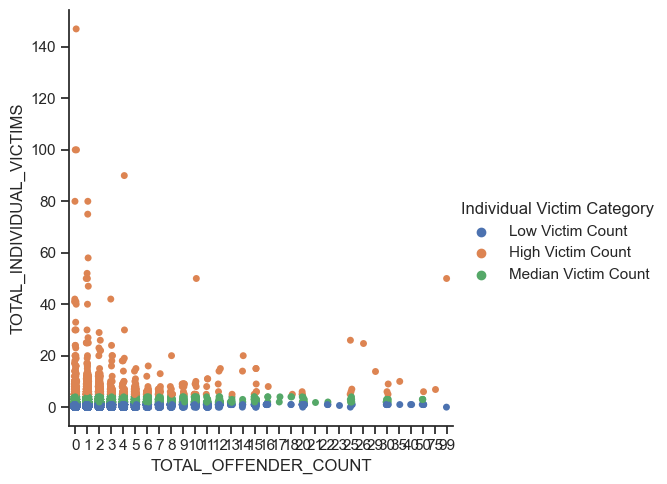

In [36]:
sns.set(style="ticks")
g = sns.catplot(x="TOTAL_OFFENDER_COUNT", y="TOTAL_INDIVIDUAL_VICTIMS", hue="Individual Victim Category", data=df)

### Questions to explore

1. What type of hate crimes are more prevalent throughout 1991-2018?
2. Have crimes increased, decreased or remained constant?
3. Is there additional data that would support causation of the rise/decline of hate crimes?
4. Which states have the highest/lowest hate crime incidents?

NOTE: These questions were not answered yet.

### Hypotheses

If the total individual victims count increases, then the victim count increases